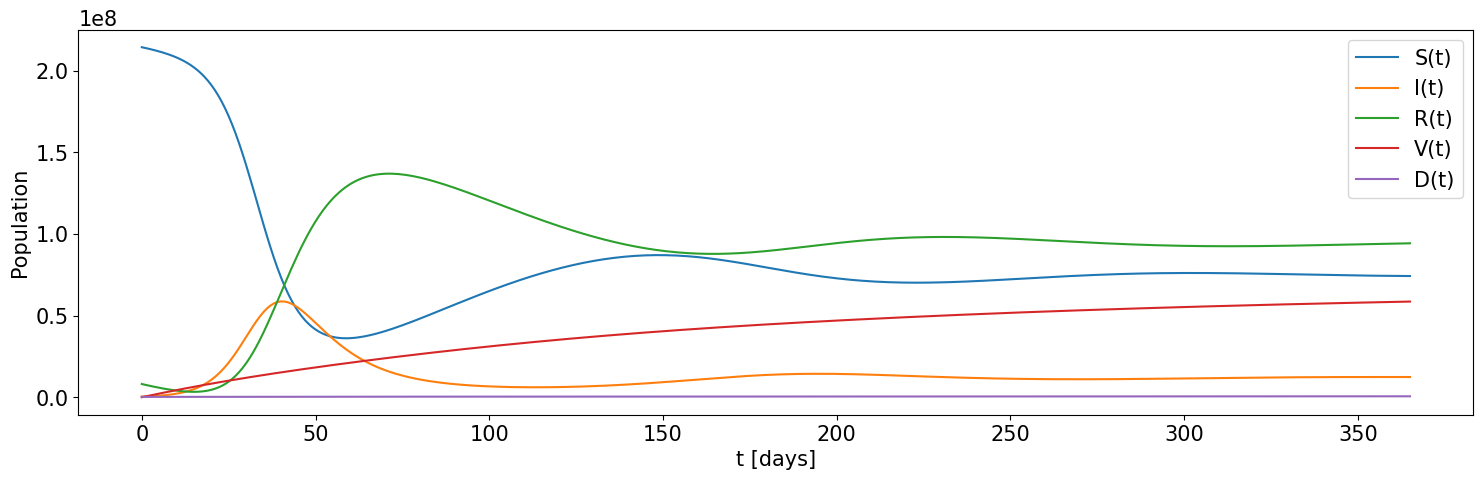

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Update matplotlib settings for readability
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [18, 5]

# Function to simulate SIR model with vaccination and two types of immunity loss using Euler's method
def SIR_Euler_with_Two_Immunity_Losses(b, k, v, d, loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate, initial_conds):
    t0 = 0  # Initial time
    t_end = 365  # Final time
    h = 1  # Step size (1 day)
    steps = int((t_end - t0) / h + 1)  # Number of steps

    # Time vector
    t = np.linspace(t0, t_end, steps)
    # Variables for S, I, R, V, D
    S, I, R, V, D = np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps)

    # Initial conditions
    S[0], I[0], R[0], V[0], D[0] = initial_conds
    N = sum(initial_conds)  # Total population

    for n in range(steps - 1):
        # People losing natural immunity and becoming susceptible again
        loss_of_natural_immunity = R[n] * loss_of_natural_immunity_rate * h
        loss_of_vaccine_immunity = V[n] * loss_of_vaccine_immunity_rate * h

        # Update equations with vaccination, loss of natural immunity, and loss of vaccine immunity
        S[n+1] = S[n] - h * ((b / N) * S[n] * I[n]) + loss_of_natural_immunity + loss_of_vaccine_immunity - (h * (v * S[n]))
        I[n+1] = I[n] + h * ((b / N) * S[n] * I[n] - k * I[n] - d * I[n])
        R[n+1] = R[n] + h * (k * I[n] - v*S[n]) - loss_of_natural_immunity
        V[n+1] = V[n] + h * ((v * S[n]) + (v*R[n]) + v*I[n]) - loss_of_vaccine_immunity
        D[n+1] = D[n] + h * (d * I[n])
 
    # Plotting
    plt.plot(t, S, label='S(t)')  # susceptible
    plt.plot(t, I, label='I(t)')  # infected
    plt.plot(t, R, label='R(t)')  # recovered
    plt.plot(t, V, label='V(t)')  # vaccinated
    plt.plot(t, D, label='D(t)')  # deceased
    plt.xlabel('t [days]')
    plt.ylabel('Population')
    plt.legend(loc='best')
    plt.show()

# Parameters
infection_rate = 0.3  # Rate of infection
recovery_rate = 0.1  # Rate of recovery
vaccination_rate = 0.00204  # Rate of vaccination
loss_of_natural_immunity_rate = 1 / 90  # Rate of loss of natural immunity
loss_of_vaccine_immunity_rate = 1 / 180  # Rate of loss of vaccine immunity
death_rate = 0.00007  # Rate of death

# Initial conditions
S0, I0, R0, V0, D0 = 214300000, 400025, 8075998, 0, 202631  # Initial susceptible, infected, recovered, vaccinated, deceased
initial_vals = [S0, I0, R0, V0, D0]

# Run the simulation
SIR_Euler_with_Two_Immunity_Losses(b=infection_rate, k=recovery_rate, v=vaccination_rate, d=death_rate,
                                   loss_of_natural_immunity_rate=loss_of_natural_immunity_rate,
                                   loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate,
                                   initial_conds=initial_vals)

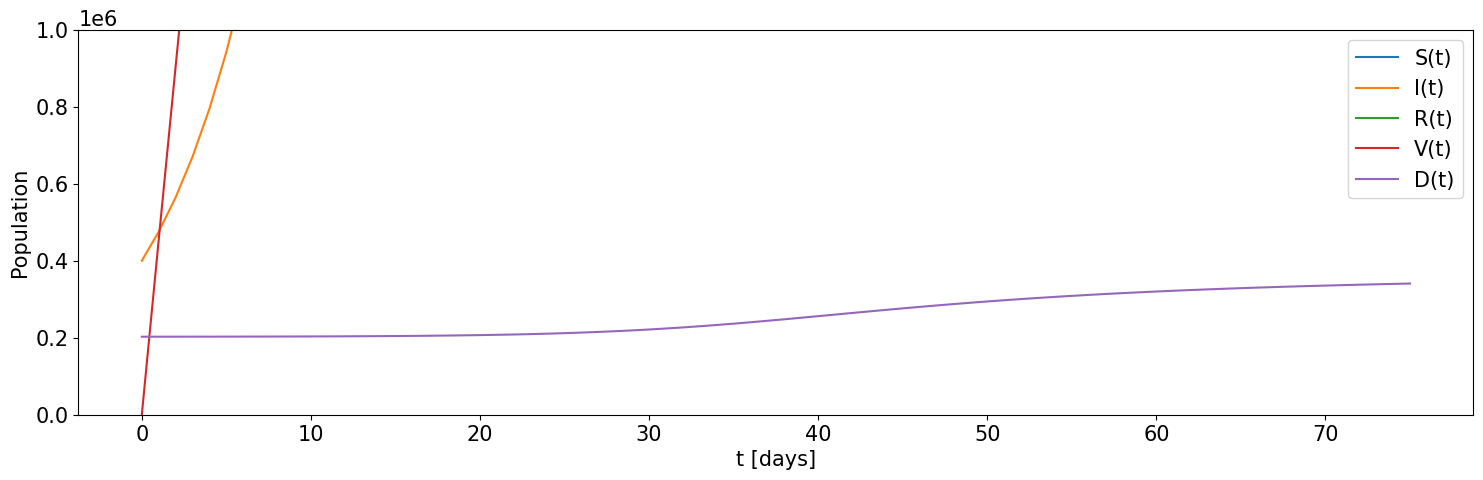

In [13]:
#Same code as before, I just limited the Y-axis for better visualization of the deceased population

# Update matplotlib settings for readability
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [18, 5]

def SIR_Euler_with_Two_Immunity_Losses(b, k, v, d, loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate, initial_conds):
    t0 = 0  # Initial time
    t_end = 75  # Final time
    h = 1  # Step size (1 day)
    steps = int((t_end - t0) / h + 1)  # Number of steps

    # Time vector
    t = np.linspace(t0, t_end, steps)
    # Variables for S, I, R, V, D
    S, I, R, V, D = np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps)

    # Initial conditions
    S[0], I[0], R[0], V[0], D[0] = initial_conds
    N = sum(initial_conds)  # Total population

    for n in range(steps - 1):
        # People losing natural immunity and becoming susceptible again
        loss_of_natural_immunity = R[n] * loss_of_natural_immunity_rate * h
        loss_of_vaccine_immunity = V[n] * loss_of_vaccine_immunity_rate * h

        # Update equations with vaccination, loss of natural immunity, and loss of vaccine immunity
        S[n+1] = S[n] - h * ((b / N) * S[n] * I[n]) + loss_of_natural_immunity + loss_of_vaccine_immunity - (h * (v * S[n]))
        I[n+1] = I[n] + h * ((b / N) * S[n] * I[n] - k * I[n] - d * I[n])
        R[n+1] = R[n] + h * (k * I[n] - v*S[n]) - loss_of_natural_immunity
        V[n+1] = V[n] + h * ((v * S[n]) + (v*R[n]) + v*I[n]) - loss_of_vaccine_immunity
        D[n+1] = D[n] + h * (d * I[n])
 
    # Plotting
    plt.plot(t, S, label='S(t)')  # Susceptible
    plt.plot(t, I, label='I(t)')  # Infected
    plt.plot(t, R, label='R(t)')  # Recovered
    plt.plot(t, V, label='V(t)')  # Vaccinated
    plt.plot(t, D, label='D(t)')  # Deceased
    plt.xlabel('t [days]')
    plt.ylabel('Population')
    plt.ylim(0,1000000)
    plt.legend(loc='best')
    plt.show()

# Parameters
infection_rate = 0.3  # Rate of infection
recovery_rate = 0.1  # Rate of recovery
vaccination_rate = 0.00204  # Rate of vaccination
loss_of_natural_immunity_rate = 1 / 90  # Rate of loss of natural immunity
loss_of_vaccine_immunity_rate = 1 / 180  # Rate of loss of vaccine immunity
death_rate = 0.00007  # Rate of death

# Initial conditions
S0, I0, R0, V0, D0 = 214300000, 400025, 8075998, 0, 202631  # Initial susceptible, infected, recovered, vaccinated, deceased
initial_vals = [S0, I0, R0, V0, D0]

# Run the simulation
SIR_Euler_with_Two_Immunity_Losses(b=infection_rate, k=recovery_rate, v=vaccination_rate, d=death_rate,
                                   loss_of_natural_immunity_rate=loss_of_natural_immunity_rate,
                                   loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate,
                                   initial_conds=initial_vals)


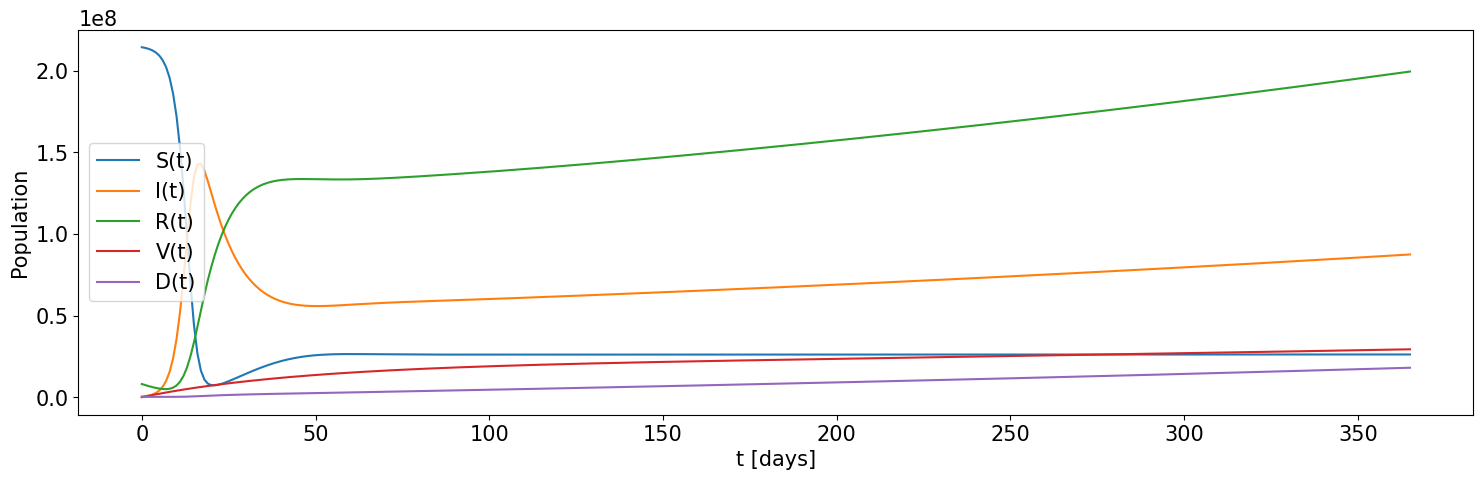

In [14]:
# Update matplotlib settings for readability
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [18, 5]

def SIR_Euler_with_Two_Immunity_Losses(b, k, v, d, loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate, initial_conds):
    t0 = 0  # Initial time
    t_end = 365  # Final time
    h = 1  # Step size (1 day)
    steps = int((t_end - t0) / h + 1)  # Number of steps

    # Time vector
    t = np.linspace(t0, t_end, steps)
    # Variables for S, I, R, V, D
    S, I, R, V, D = np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps)

    # Initial conditions
    S[0], I[0], R[0], V[0], D[0] = initial_conds
    N = sum(initial_conds)  # Total population

    for n in range(steps - 1):
        # People losing natural immunity and becoming susceptible again
        loss_of_natural_immunity = R[n] * loss_of_natural_immunity_rate * h
        loss_of_vaccine_immunity = V[n] * loss_of_vaccine_immunity_rate * h

        # Update equations with vaccination, loss of natural immunity, and loss of vaccine immunity
        S[n+1] = S[n] - h * ((b / N) * S[n] * I[n]) + loss_of_natural_immunity + loss_of_vaccine_immunity - (h * (v * S[n]))
        I[n+1] = I[n] + h * ((b / N) * S[n] * I[n] - k * I[n] - d * I[n])
        R[n+1] = R[n] + h * (k * I[n] - v*S[n]) - loss_of_natural_immunity
        V[n+1] = V[n] + h * ((v * S[n]) + (v*R[n]) + v*I[n]) - loss_of_vaccine_immunity
        D[n+1] = D[n] + h * (d * I[n])
 
    # Plotting
    plt.plot(t, S, label='S(t)')  # Susceptible
    plt.plot(t, I, label='I(t)')  # Infected
    plt.plot(t, R, label='R(t)')  # Recovered
    plt.plot(t, V, label='V(t)')  # Vaccinated
    plt.plot(t, D, label='D(t)')  # Deceased
    plt.xlabel('t [days]')
    plt.ylabel('Population')
    plt.legend(loc='best')
    plt.show()
    
# Parameters
infection_rate = 0.7  # Rate of infection
recovery_rate = 0.08  # Rate of recovery
vaccination_rate = 0.002  # Rate of vaccination
loss_of_natural_immunity_rate = 1 / 30  # Rate of loss of natural immunity
loss_of_vaccine_immunity_rate = 1 / 50  # Rate of loss of vaccine immunity
death_rate = 0.0007  # Rate of death

# Initial conditions
S0, I0, R0, V0, D0 = 214300000, 400025, 8075998, 0, 202631  # Initial susceptible, infected, recovered, vaccinated, deceased
initial_vals = [S0, I0, R0, V0, D0]

# Run the simulation
SIR_Euler_with_Two_Immunity_Losses(b=infection_rate, k=recovery_rate, v=vaccination_rate, d=death_rate,
                                   loss_of_natural_immunity_rate=loss_of_natural_immunity_rate,
                                   loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate,
                                   initial_conds=initial_vals)

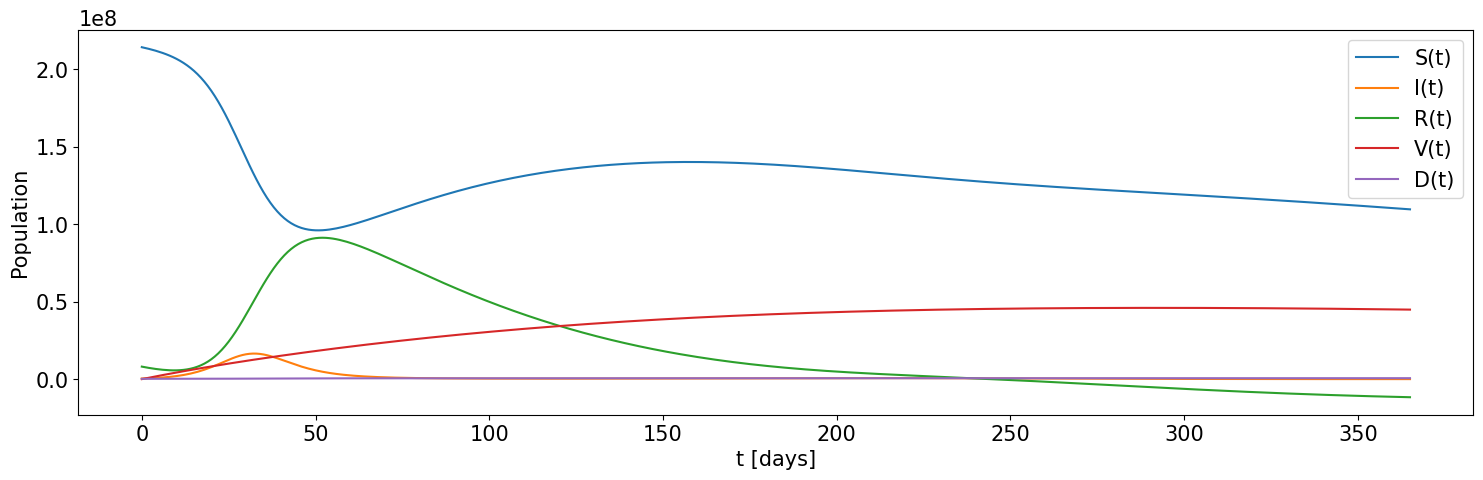

In [15]:
# Update matplotlib settings for readability
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [18, 5]

# Parameters
infection_rate = 0.5  # Rate of infection
recovery_rate = 0.3  # Rate of recovery
vaccination_rate = 0.002  # Rate of vaccination
loss_of_natural_immunity_rate = 1 / 70  # Rate of loss of natural immunity
loss_of_vaccine_immunity_rate = 1 / 200  # Rate of loss of vaccine immunity
death_rate = 0.0007  # Rate of death

# Initial conditions
S0, I0, R0, V0, D0 = 214300000, 400025, 8075998, 0, 202631  # Initial susceptible, infected, recovered, vaccinated, deceased
initial_vals = [S0, I0, R0, V0, D0]

# Run the simulation
SIR_Euler_with_Two_Immunity_Losses(b=infection_rate, k=recovery_rate, v=vaccination_rate, d=death_rate,
                                   loss_of_natural_immunity_rate=loss_of_natural_immunity_rate,
                                   loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate,
                                   initial_conds=initial_vals)

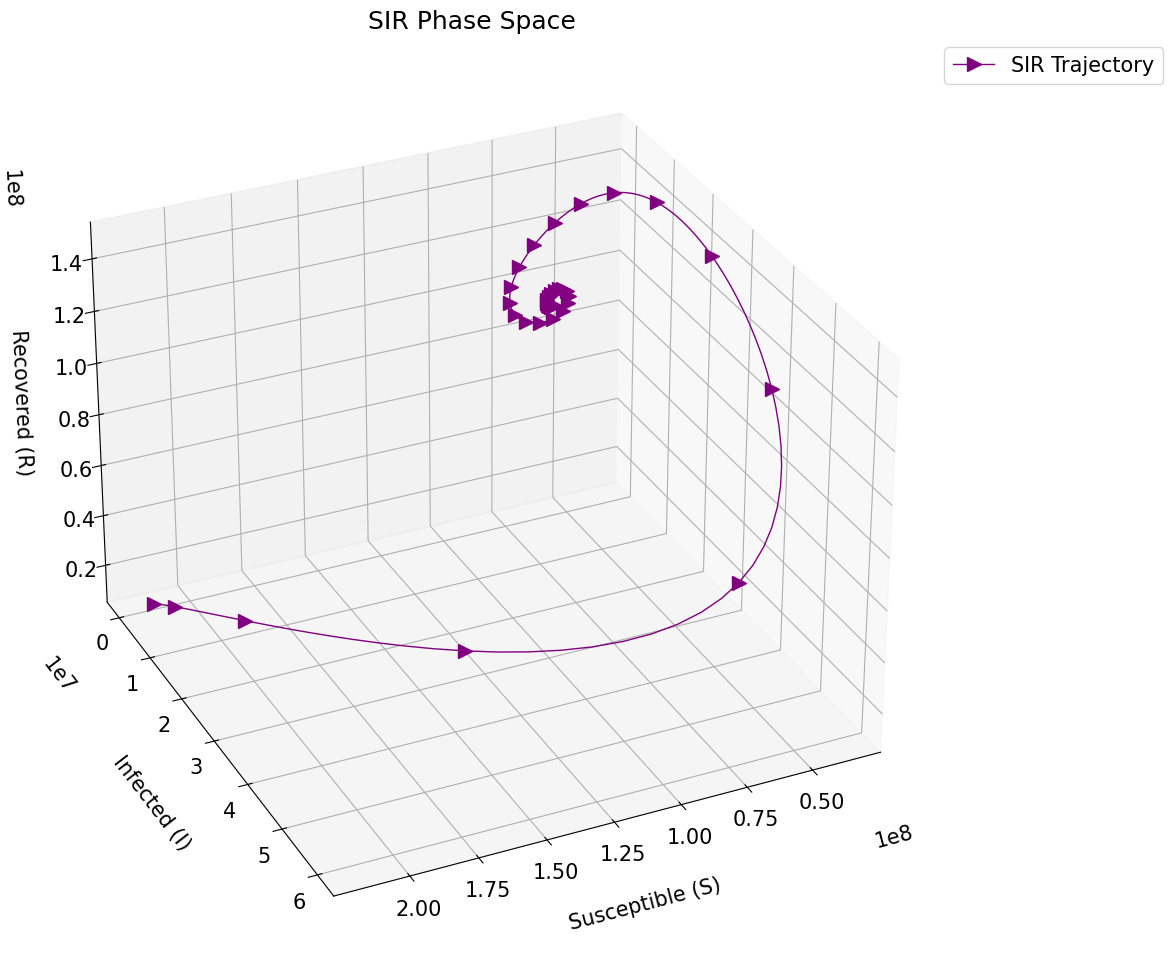

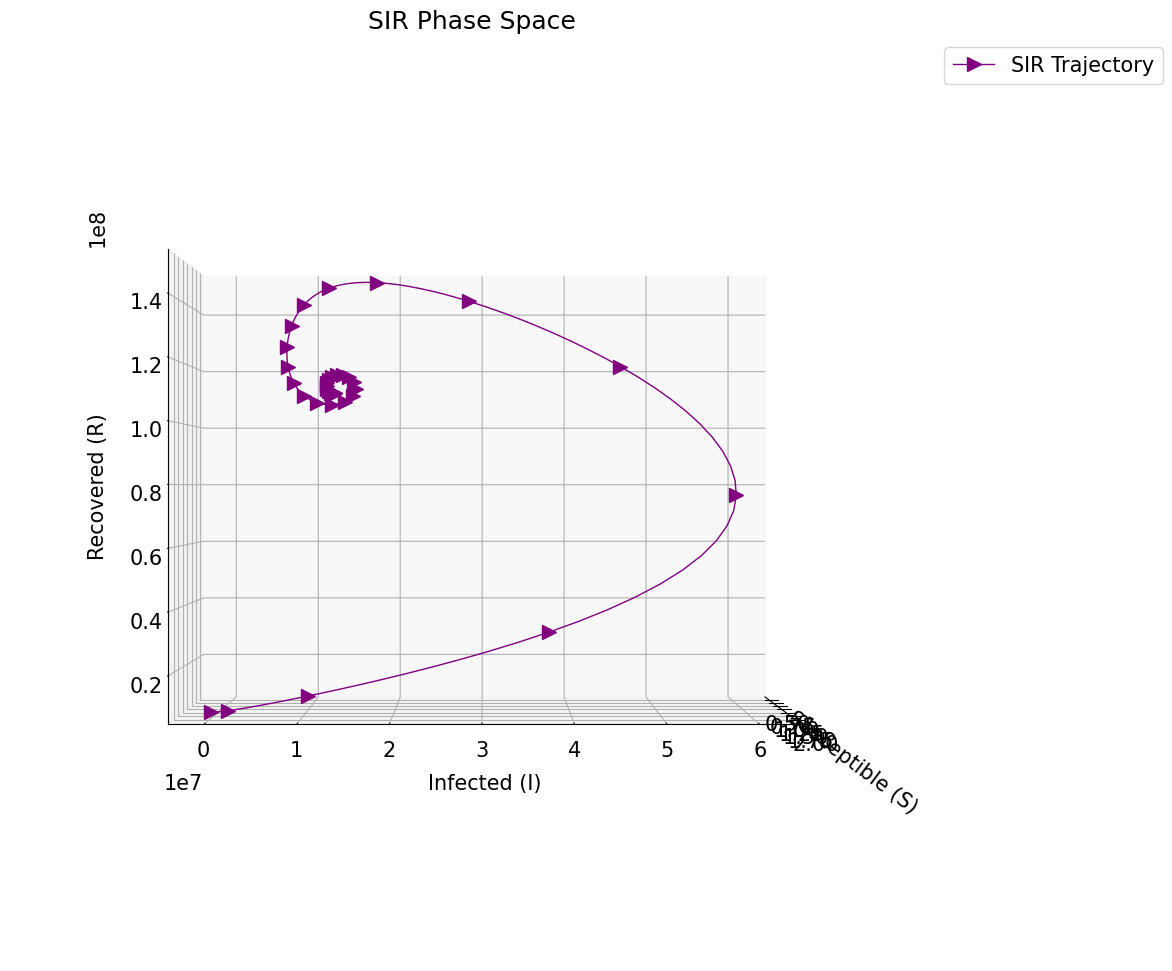

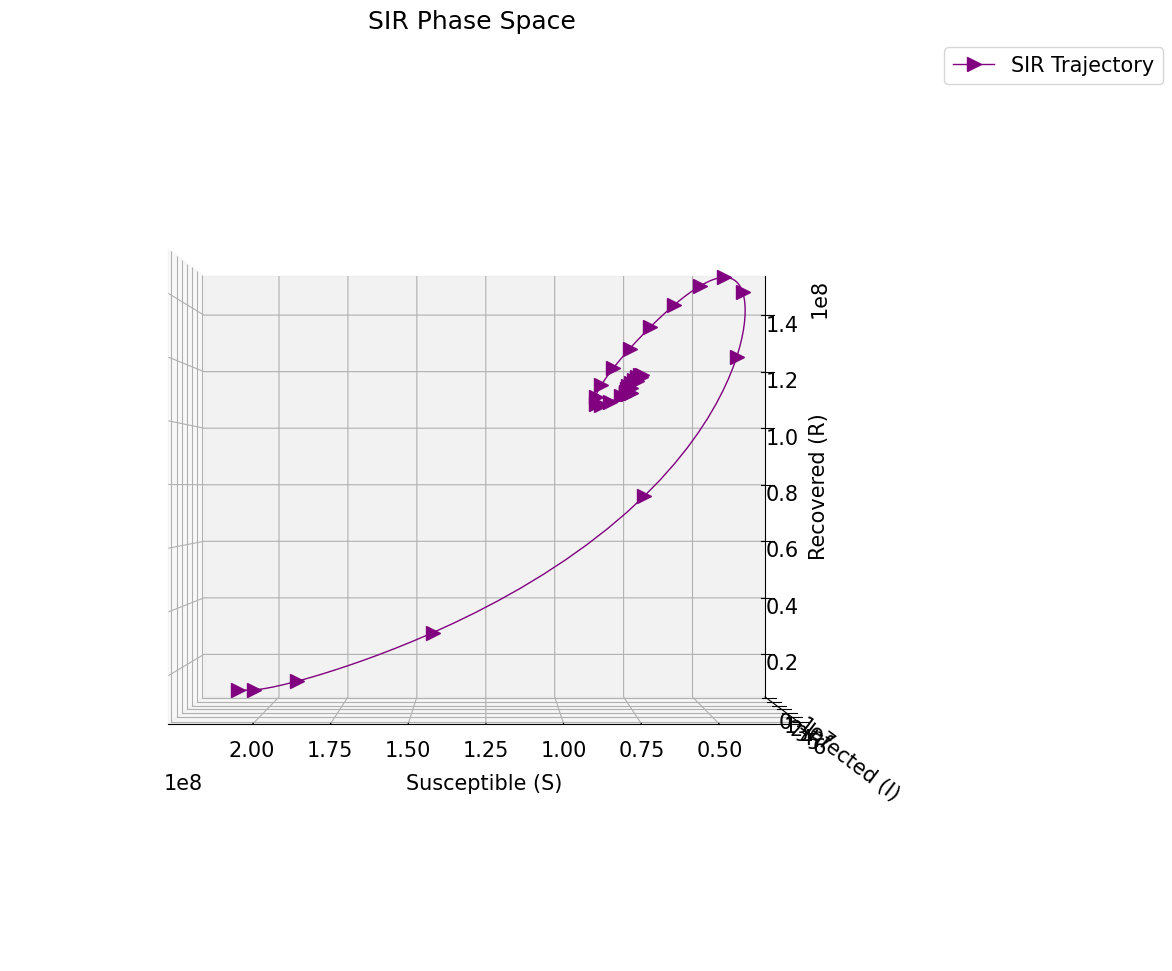

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Update the default font size for readability
plt.rcParams.update({'font.size': 15})
# Set the default figure size
plt.rcParams["figure.figsize"] = [10, 7]

def SIR_phase_space(b, k, v, d, loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate, initial_conds, elev, azim):
    # Initialize the time settings
    t0 = 0
    t_end = 365
    h = 1  # Step size
    steps = int((t_end - t0) / h + 1)  # Number of steps

    # Initialize arrays for the SIR model variables
    S, I, R, V, D = np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps)

    # Set the initial conditions
    S[0], I[0], R[0], V[0], D[0] = initial_conds

    # Total population excluding the deceased
    N = sum(initial_conds) - D[0]

    # Simulate the model over time
    for n in range(steps - 1):
        # People losing natural immunity and becoming susceptible again
        loss_of_natural_immunity = R[n] * loss_of_natural_immunity_rate * h
        loss_of_vaccine_immunity = V[n] * loss_of_vaccine_immunity_rate * h

        # Update equations with vaccination, loss of natural immunity, and loss of vaccine immunity
        S[n+1] = S[n] - (b / N) * S[n] * I[n] * h + loss_of_natural_immunity + loss_of_vaccine_immunity - v * S[n] * h
        I[n+1] = I[n] + (b / N) * S[n] * I[n] * h - k * I[n] * h - d * I[n] * h
        R[n+1] = R[n] + k * I[n] * h - loss_of_natural_immunity
        V[n+1] = V[n] + v * S[n] * h - loss_of_vaccine_immunity
        D[n+1] = D[n] + d * I[n] * h

    # Create a 3D plot
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the SIR trajectory
    ax.plot(S, I, R, marker='>', markevery=10, linestyle='-', linewidth=1, markersize=10, label='SIR Trajectory', color='purple')

    # Set labels for each axis with padding, because it was very weird to see without it
    ax.set_xlabel('Susceptible (S)', labelpad=20)
    ax.set_ylabel('Infected (I)', labelpad=20)
    ax.set_zlabel('Recovered (R)', labelpad=15)

    # Set the title of the plot
    ax.set_title('SIR Phase Space')

    # Set the position of the legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Set the view angle for better visualization
    ax.view_init(elev=elev, azim=azim)

    # Show the plot
    plt.show()

# Define the model parameters
infection_rate = 0.3  # One person infects another every 3 days
recovery_rate = 0.1  # One person recovers in 10 days
vaccination_rate = 0.00204  # Percentage of vaccination per day
loss_of_natural_immunity_rate = 1 / 90  # Loss of natural immunity rate
loss_of_vaccine_immunity_rate = 1 / 180  # Loss of vaccine immunity rate
death_rate = 0.00007  # Mortality rate

# Set the initial conditions
S0, I0, R0, V0, D0 = 214300000, 400025, 8075998, 0, 202631
initial_vals = [S0, I0, R0, V0, D0]

# Call the function to run the simulation and plot
# Plot with the best visualization of all variables
SIR_phase_space(b=infection_rate, k=recovery_rate, v=vaccination_rate, d=death_rate, loss_of_natural_immunity_rate=loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate, initial_conds=initial_vals, elev=30, azim=65)
# Plot with the best visualization to analyze the infected
SIR_phase_space(b=infection_rate, k=recovery_rate, v=vaccination_rate, d=death_rate, loss_of_natural_immunity_rate=loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate, initial_conds=initial_vals, elev=0, azim=0)
# Plot with the best visualization to analyze the susceptible and recovered
SIR_phase_space(b=infection_rate, k=recovery_rate, v=vaccination_rate, d=death_rate, loss_of_natural_immunity_rate=loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate, initial_conds=initial_vals, elev=0, azim=90)


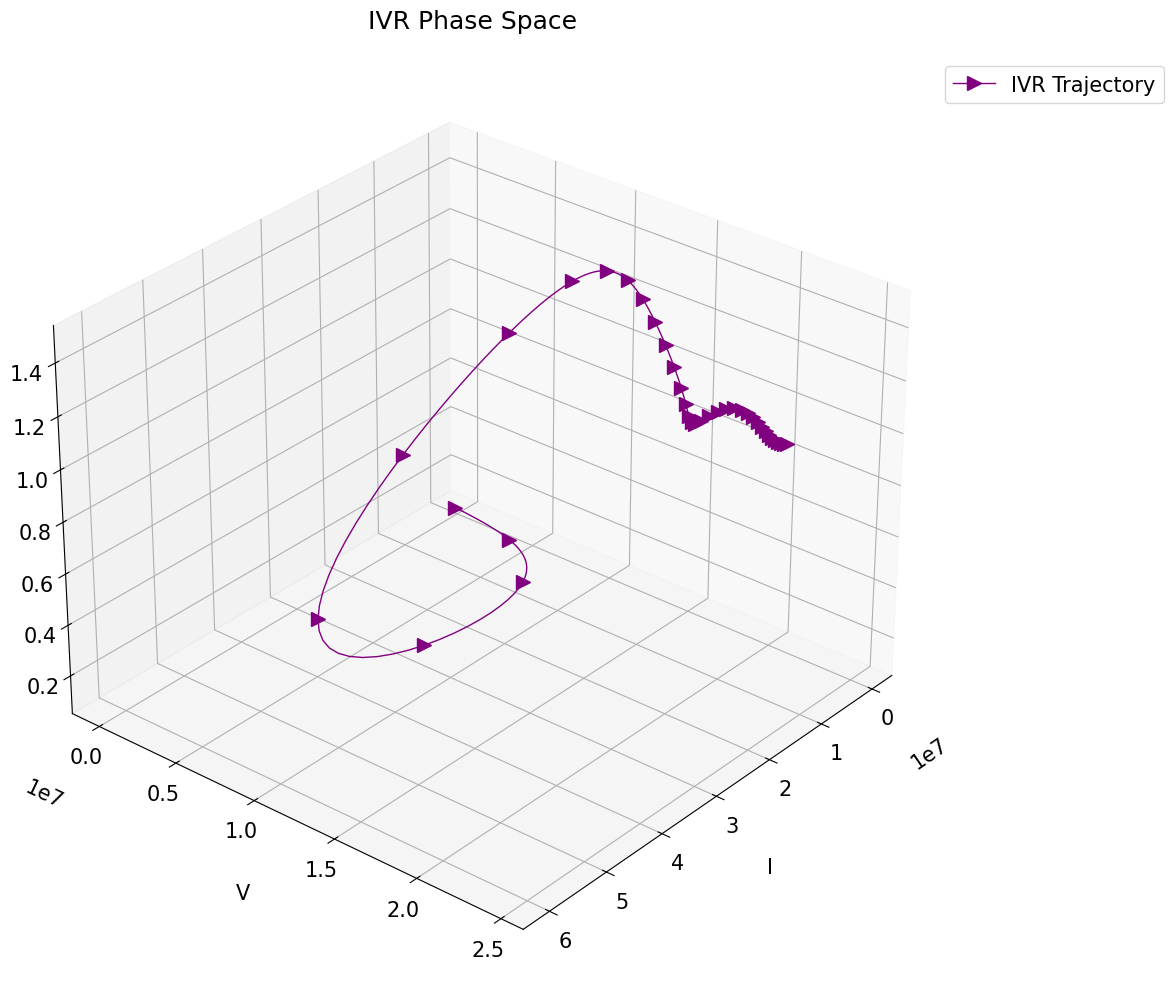

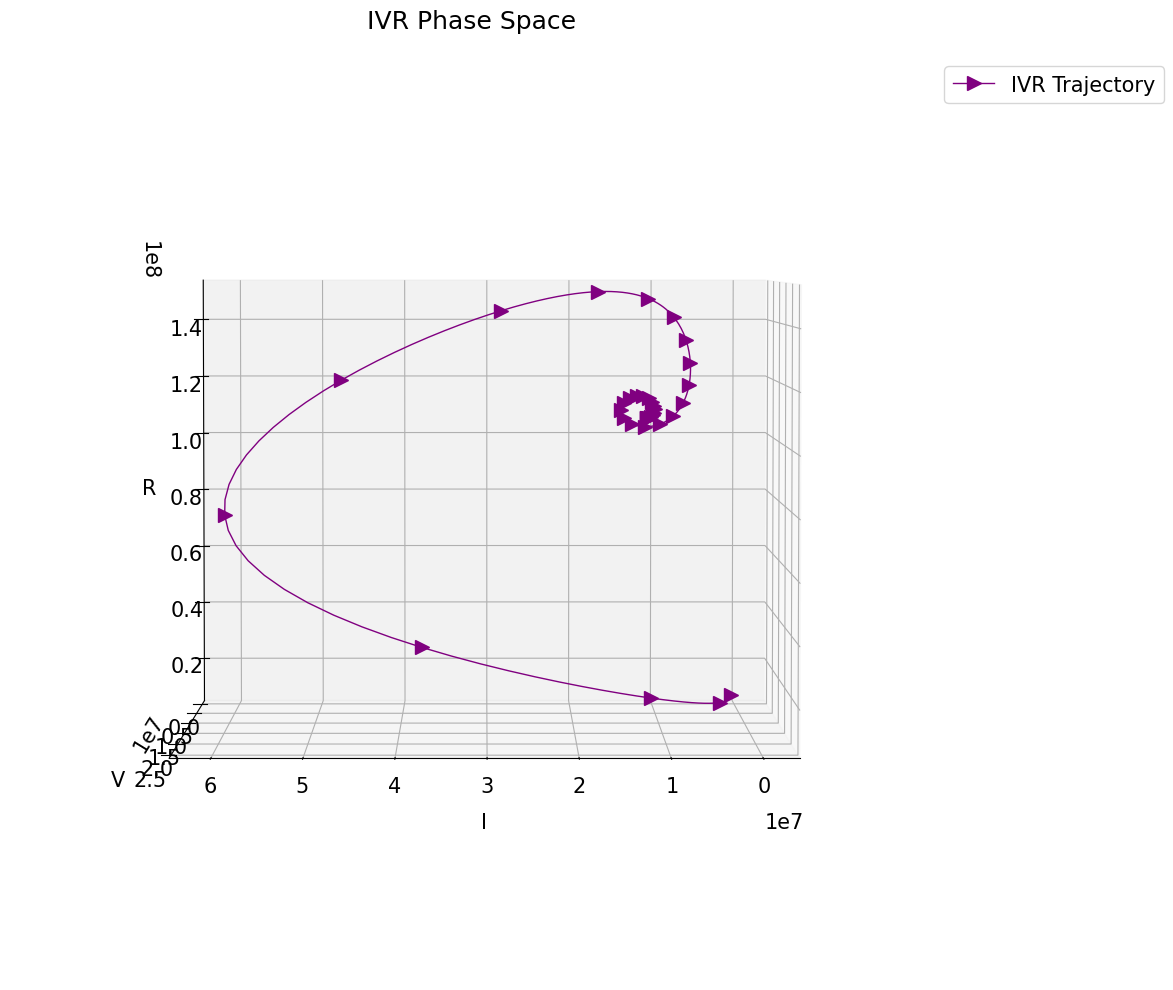

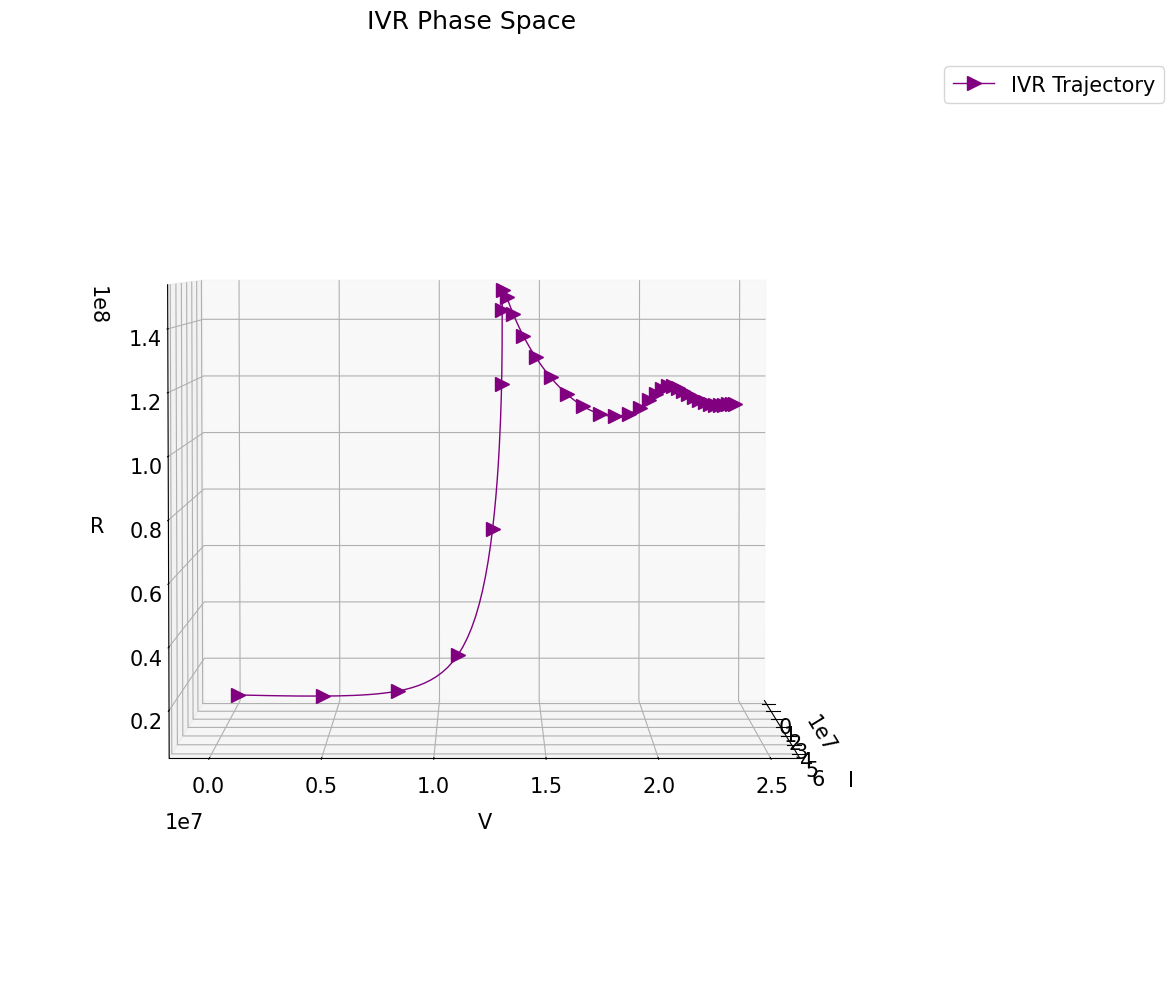

In [28]:
#Same code as the last, just changing the visualization for different variables 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Update the default settings for the plot
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [12, 8]

# Define the function to simulate and visualize SIR phase space
def SIR_phase_space(b, k, v, d, loss_of_natural_immunity_rate, loss_of_vaccine_immunity_rate, initial_conds, elev, azim):
    # Initialize the time settings
    t0 = 0
    t_end = 365
    h = 1
    steps = int((t_end - t0) / h + 1)

    # Initialize arrays for the SIR model variables
    S, I, R, V, D = np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps)

    # Set the initial conditions
    S[0], I[0], R[0], V[0], D[0] = initial_conds

    # Total population excluding the deceased
    N = sum(initial_conds) - D[0]

    # Simulate the model over time
    for n in range(steps - 1):
        # People losing natural immunity and becoming susceptible again
        loss_of_natural_immunity = R[n] * loss_of_natural_immunity_rate * h
        loss_of_vaccine_immunity = V[n] * loss_of_vaccine_immunity_rate * h

        # Update equations with vaccination, loss of natural immunity, and loss of vaccine immunity
        S[n+1] = S[n] - (b / N) * S[n] * I[n] * h + loss_of_natural_immunity + loss_of_vaccine_immunity - v * S[n] * h
        I[n+1] = I[n] + (b / N) * S[n] * I[n] * h - k * I[n] * h - d * I[n] * h
        R[n+1] = R[n] + k * I[n] * h - loss_of_natural_immunity
        V[n+1] = V[n] + v * S[n] * h - loss_of_vaccine_immunity
        D[n+1] = D[n] + d * I[n] * h

    # Create a 3D plot
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the IVD (Infected, Vaccinated, Deceased) trajectory
    ax.plot(I, V, R, marker='>', markevery=10, linestyle='-', linewidth=1, markersize=10, label='IVR Trajectory', color='purple')

    # Set the labels with padding
    ax.set_xlabel('I', labelpad=20)  # Infected
    ax.set_ylabel('V', labelpad=20)  # Vaccinated
    ax.set_zlabel('R', labelpad=15)  # Recovered

    # Set the title with padding
    ax.set_title('IVR Phase Space', pad=20)

    # Set the position of the legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Set the view angle
    ax.view_init(elev=elev, azim=azim)

    # Show the plot
    plt.show()

# Define the model parameters
infection_rate = 0.3  # one person infects another every 3 days
recovery_rate = 0.1  # one person recovers in 10 days
vaccination_rate = 0.00204  # percentage of vaccination per day
loss_of_natural_immunity_rate = 1 / 90  # loss of natural immunity rate
loss_of_vaccine_immunity_rate = 1 / 180  # loss of vaccine immunity rate
death_rate = 0.00007  # mortality rate

# Initial conditions: Susceptible, Infected, Recovered, Vaccinated, Deceased
S0, I0, R0, V0, D0 = 214300000, 400025, 8075998, 0, 202631
initial_vals = [S0, I0, R0, V0, D0]

# Call the function to run the simulation and plot - I did 3 plots to be able to understand better each axis.
# FIRST: This one has the best visualization that I could find to see all of the variables
SIR_phase_space(b=infection_rate, k=recovery_rate,v=vaccination_rate,d=death_rate, loss_of_natural_immunity_rate=loss_of_natural_immunity_rate,loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate, initial_conds=initial_vals, elev=30, azim=40)
# SECOND: This one has the best visualization to analyze the INFECTED
SIR_phase_space(b=infection_rate, k=recovery_rate,v=vaccination_rate,d=death_rate, loss_of_natural_immunity_rate=loss_of_natural_immunity_rate,loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate, initial_conds=initial_vals, elev=3, azim=90)
# THIRD: This one has the best visualization to analyze the VACCINATED and RECOVERED
SIR_phase_space(b=infection_rate, k=recovery_rate,v=vaccination_rate,d=death_rate, loss_of_natural_immunity_rate=loss_of_natural_immunity_rate,loss_of_vaccine_immunity_rate=loss_of_vaccine_immunity_rate, initial_conds=initial_vals, elev=3, azim=0)

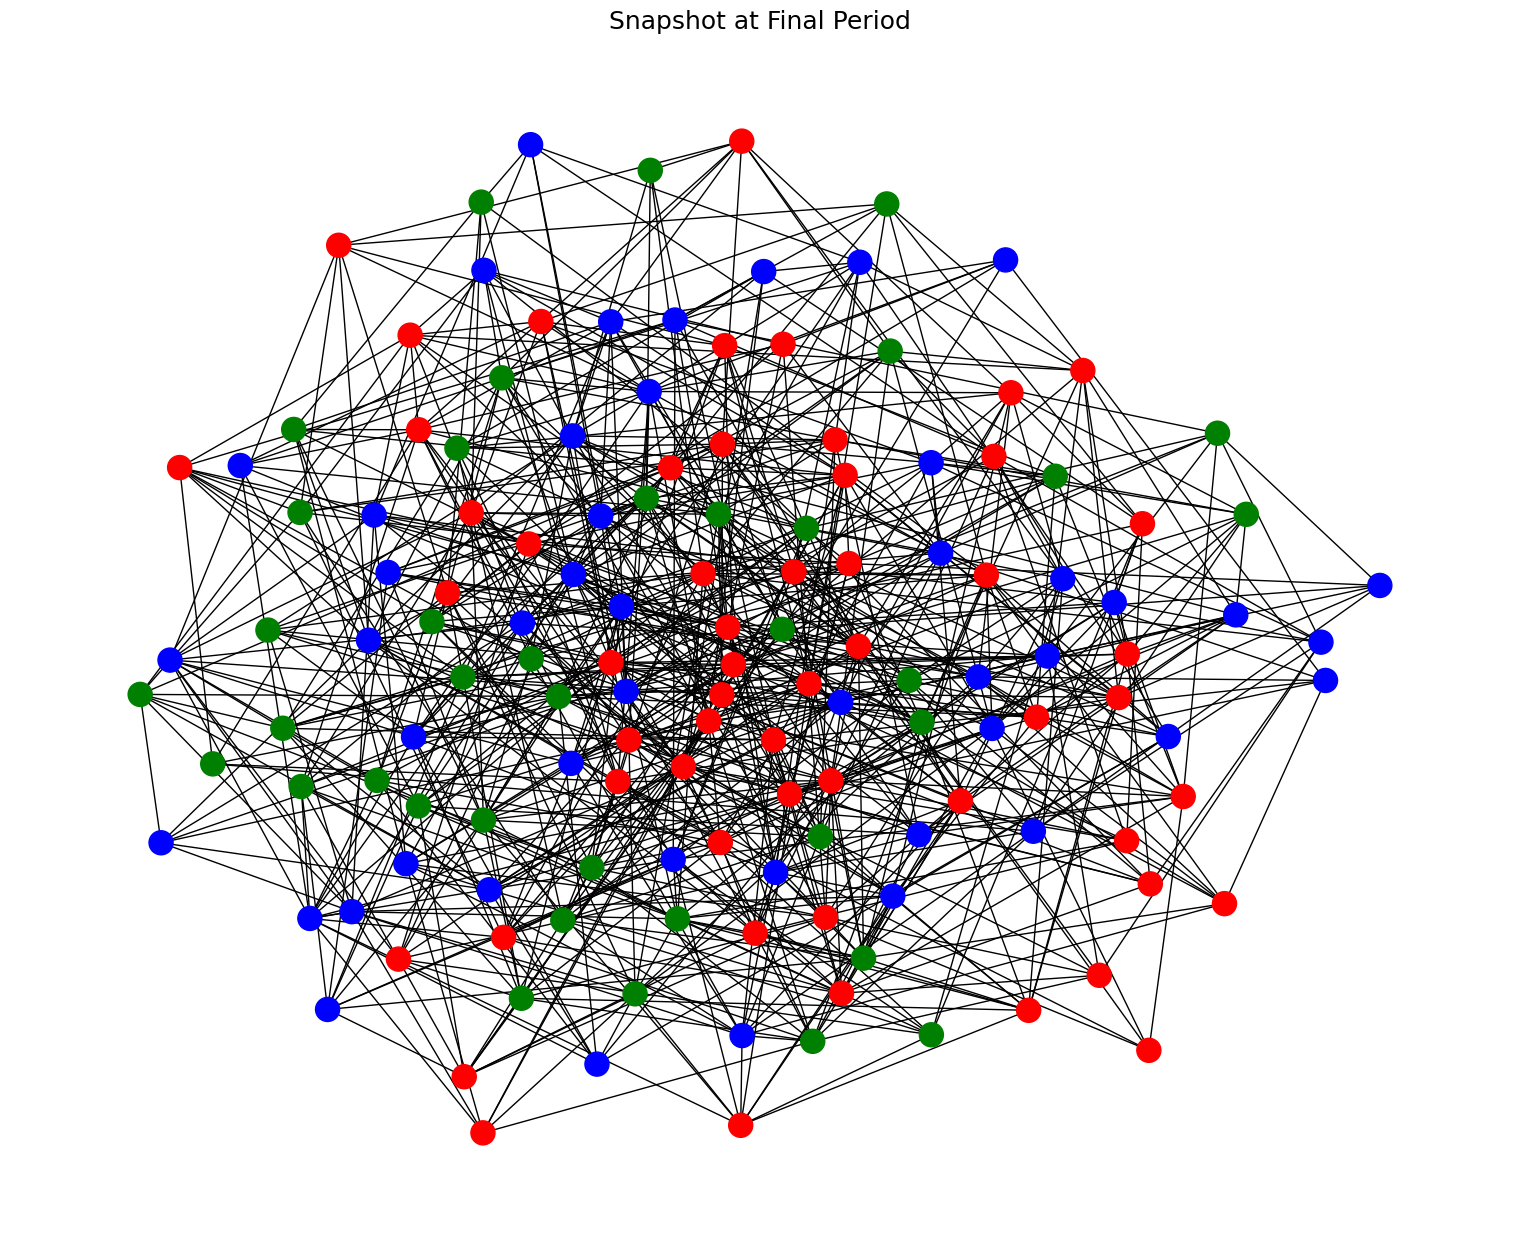

In [19]:
# I decided to do a model simulation the spread of an infectious disease through a population using a network-based approach, considering individual interactions. I thought about doing the tree graph, but with my research I realized that a tree graph has a strict hierarchical structure without cycles, meaning no individual could be reinfected, nor could there be multiple pathways of infection between individuals. 
#Each node in the network represents an individual, color-coded by their disease status: susceptible (blue), infected (red), or recovered (green). The model includes vaccination, with a certain percentage of the population initially vaccinated. Infections spread as infected individuals interact with susceptible ones, who may then become infected themselves. Recovery is assumed after 14 days, with a small chance of reinfection. The model runs for a set number of days, taking snapshots of the disease spread at regular intervals. The final snapshot depicts the end state of the outbreak within the network.
#I decided to not include all of the variables I used for the SIRVD because of computational capacity, the model started lagging and not loading when I tried. Also, the values of the parameters here were not calculated as my SIRVD model because I did not find specificities on how to translate them to the ABM.

import random
import matplotlib.pyplot as plt
import networkx as nx

class Individual:
    def __init__(self, identifier, status="susceptible", vaccinated=False):
        # Initialize an individual with a unique identifier, status, and vaccination status
        self.identifier = identifier
        self.status = status  # Options: 'susceptible', 'infected', 'recovered'
        self.vaccinated = vaccinated
        self.days_since_infection = 0

    def update_status(self):
        # Update individual's status based on the elapsed time since infection
        if self.status == "infected":
            self.days_since_infection += 1
            if self.days_since_infection > 14:  # Assume recovery happens after 14 days
                self.status = "recovered"
                self.days_since_infection = 0  # Reset days since infection
        elif self.status == "recovered":
            if random.random() < 0.1:  # Assume 1% chance of reinfection after recovery
                self.status = "susceptible"

class Simulation:
    def __init__(self, population_size, initial_infected=1, vaccination_rate=0.0, snapshot_interval=10):
        # Initialize the simulation with a population, initial infections, vaccination rate, and snapshot interval
        self.population = [Individual(i) for i in range(population_size)]
        self.day = 0
        self.transmission_graph = nx.Graph()
        self.snapshots = []  # To store snapshots of the graph
        self.snapshot_interval = snapshot_interval
        self.vaccinate_population(vaccination_rate)
        self.initial_infection(initial_infected)

    def vaccinate_population(self, vaccination_rate):
        # Vaccinate individuals in the population based on the given rate
        for individual in self.population:
            if random.random() < vaccination_rate:
                individual.vaccinated = True 

    def initial_infection(self, initial_infected):
        # Infect a specified number of individuals initially
        infected = random.sample(self.population, initial_infected)
        for individual in infected:
            individual.status = "infected"
            self.transmission_graph.add_node(individual.identifier)

    def step(self):
        # Simulate one step of the disease spread
        for individual in self.population:
            if individual.status == "infected":
                for _ in range(random.randint(0, 3)):  # Simulate random interactions
                    target = random.choice(self.population)
                    if target.status == "susceptible" and not target.vaccinated:
                        target.status = "infected"
                        self.transmission_graph.add_edge(individual.identifier, target.identifier)
                individual.update_status()
            elif individual.status == "recovered":
                individual.update_status()  # Check for reinfection
        if self.day % self.snapshot_interval == 0:
            self.take_snapshot()
        self.day += 1

    def take_snapshot(self):
        # Take a snapshot of the transmission graph
        self.snapshots.append(nx.convert_node_labels_to_integers(self.transmission_graph.copy()))

    def run(self, days=50):
        # Run the simulation for the specified number of days
        for _ in range(days):
            self.step()

    def plot_final_snapshot(self):
        # Plot the final snapshot of the transmission graph
        color_map = {'susceptible': 'blue', 'infected': 'red', 'recovered': 'green'}
        final_snapshot = self.snapshots[-1]  # Taking the last snapshot
        colors = []
        for n in range(len(final_snapshot)):
            status = self.population[n].status
            if status in color_map:  # Exclude vaccinated individuals from color mapping, because it was confusing with them and actually not that necessary
                colors.append(color_map[status])
        plt.figure(figsize=(15, 12))
        nx.draw(final_snapshot, node_color=colors)
        plt.title(f"Snapshot at Final Period")
        plt.show()

# Parameters
population_size = 200
initial_infected = 3
vaccination_rate = 0.3  # 30% vaccination rate

# Create and run the simulation
simulation = Simulation(population_size, initial_infected, vaccination_rate)
simulation.run(days=150)
simulation.plot_final_snapshot()

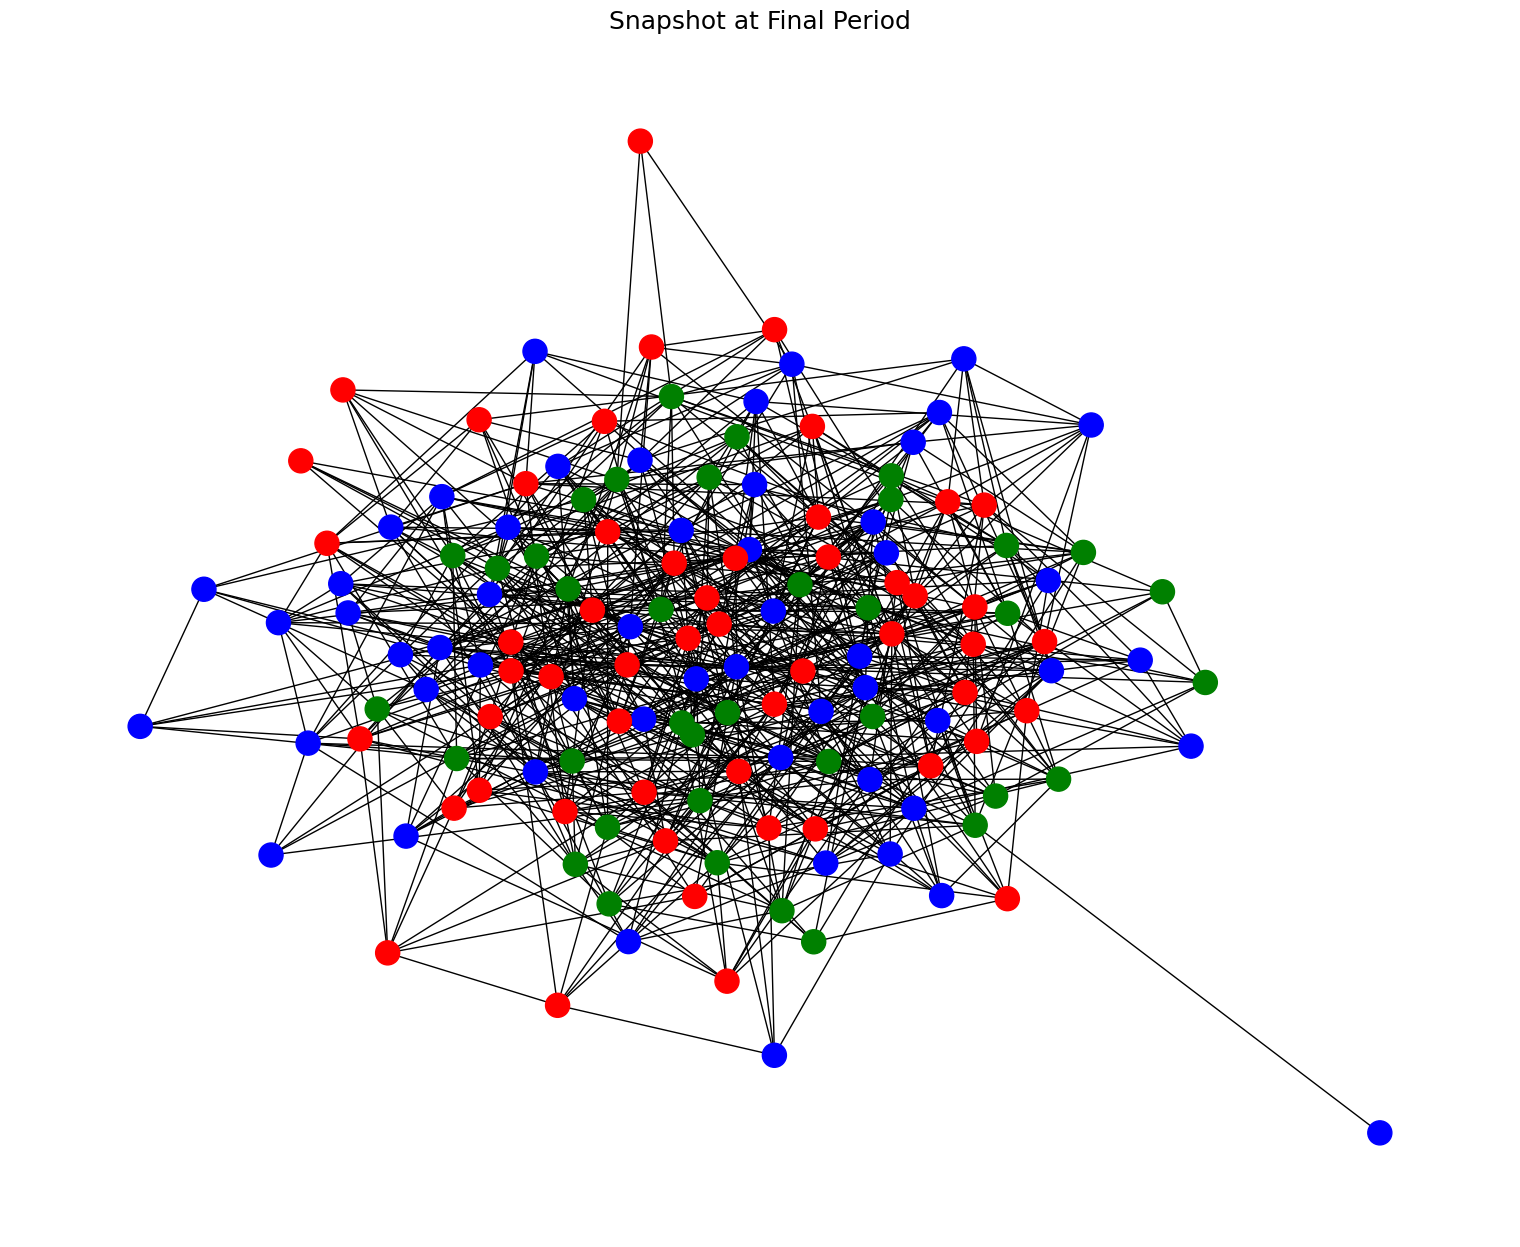

In [22]:
# Running again to make sure the outcome is different
snapshot_interval = 10  # Define the snapshot interval
simulation = Simulation(population_size, initial_infected, vaccination_rate, snapshot_interval)
simulation.run(days=150)
simulation.plot_final_snapshot()

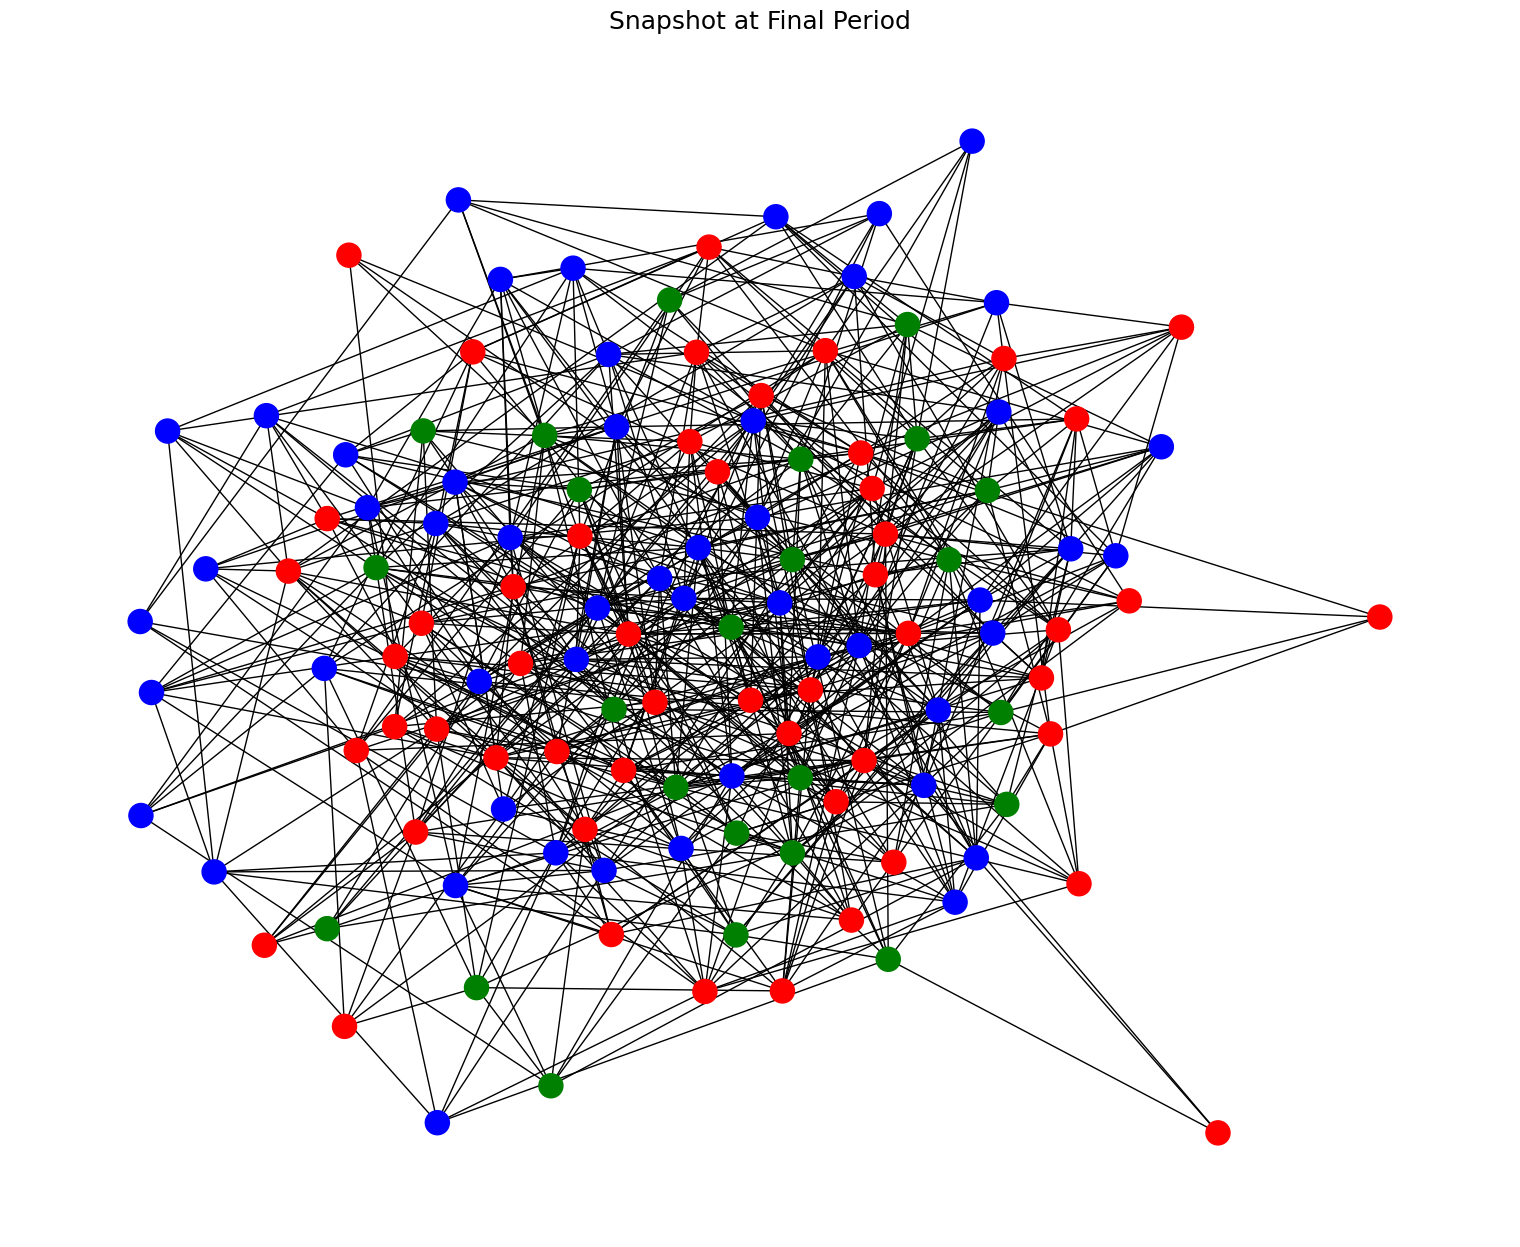

In [26]:
# Running again to make sure the outcome is different
population_size = 200  # Define the population size
initial_infected = 3  # Define the initial number of infected individuals
vaccination_rate = 0.3  # Define the vaccination rate
snapshot_interval = 10  # Define the snapshot interval

simulation = Simulation(population_size, initial_infected, vaccination_rate, snapshot_interval)
simulation.run(days=150)
simulation.plot_final_snapshot()

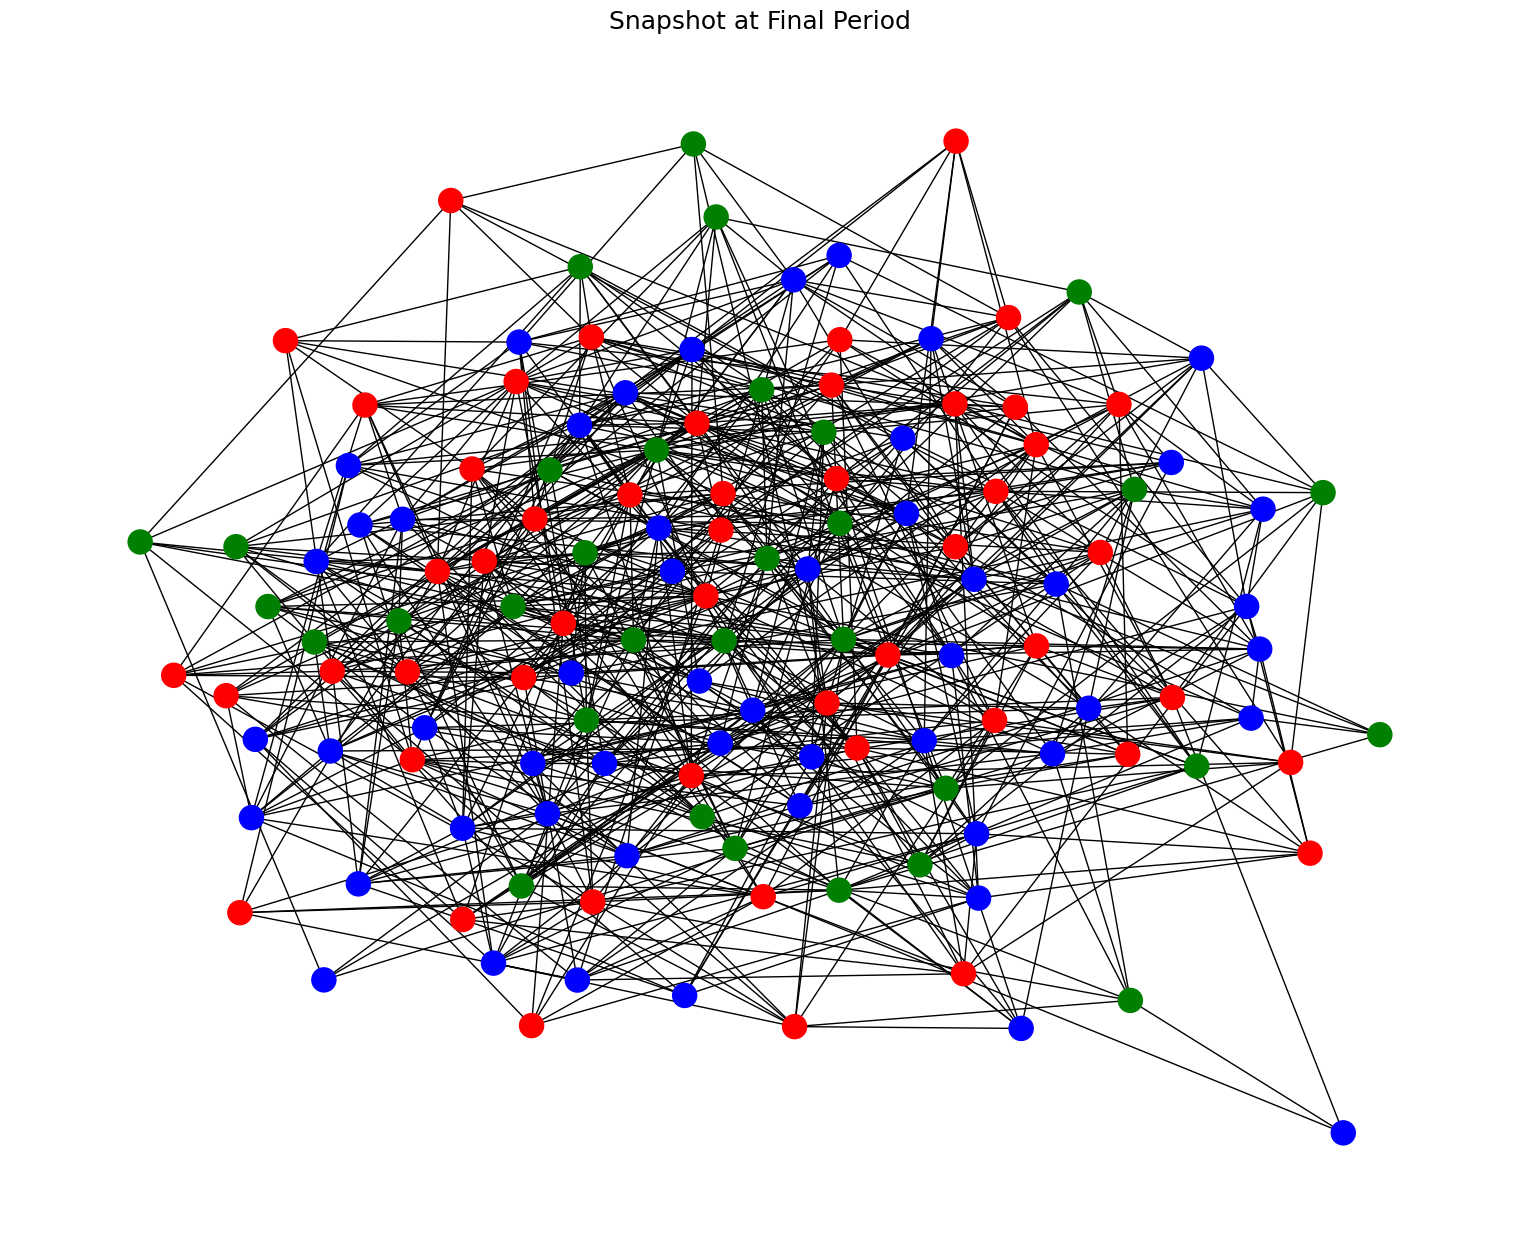

In [27]:
# Running again to make sure the outcome is different
population_size = 200  # Define the population size
initial_infected = 3  # Define the initial number of infected individuals
vaccination_rate = 0.3  # Define the vaccination rate
snapshot_interval = 10  # Define the snapshot interval

simulation = Simulation(population_size, initial_infected, vaccination_rate, snapshot_interval)
simulation.run(days=150)
simulation.plot_final_snapshot()